# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = f'{url}appid={weather_api_key}&units={units}&q='
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
    
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #print(city_weather)
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | itupiranga
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | ust'-barguzin
Processing Record 11 of Set 1 | brookings
Processing Record 12 of Set 1 | korop
Processing Record 13 of Set 1 | toba
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | puerto real
Processing Record 19 of Set 1 | malpica
Processing Record 20 of Set 1 | saijo
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | antofagasta
Processing Record 23 of Set 1 |

Processing Record 36 of Set 4 | flying fish cove
Processing Record 37 of Set 4 | bondo
Processing Record 38 of Set 4 | iquique
Processing Record 39 of Set 4 | singarayakonda
Processing Record 40 of Set 4 | hualien city
Processing Record 41 of Set 4 | termoli
Processing Record 42 of Set 4 | aasiaat
Processing Record 43 of Set 4 | altos
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | zhelezinka
Processing Record 46 of Set 4 | nyurba
Processing Record 47 of Set 4 | korla
Processing Record 48 of Set 4 | usakos
Processing Record 49 of Set 4 | wenling
Processing Record 0 of Set 5 | nova vicosa
Processing Record 1 of Set 5 | mzimba
Processing Record 2 of Set 5 | eminabad
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | buta
Processing Record 5 of Set 5 | pyapon
Processing Record 6 of Set 5 | whitehorse
Processing Record 7 of Set 5 | todos santos
Processing Record 8 of Set 5 | inekar
City not found. Skipping...
Processing Record 9 of Se

Processing Record 28 of Set 8 | tahe
Processing Record 29 of Set 8 | baijiantan
Processing Record 30 of Set 8 | rumbek
Processing Record 31 of Set 8 | la passe
Processing Record 32 of Set 8 | pionerskiy
Processing Record 33 of Set 8 | mahdia
Processing Record 34 of Set 8 | hithadhoo
Processing Record 35 of Set 8 | voskresenskoye
Processing Record 36 of Set 8 | kuala belait
Processing Record 37 of Set 8 | port glaud
City not found. Skipping...
Processing Record 38 of Set 8 | avellaneda
Processing Record 39 of Set 8 | raipur
Processing Record 40 of Set 8 | payakumbuh
Processing Record 41 of Set 8 | yevpatoriya
Processing Record 42 of Set 8 | nuzvid
Processing Record 43 of Set 8 | el calafate
Processing Record 44 of Set 8 | chibougamau
Processing Record 45 of Set 8 | suva
Processing Record 46 of Set 8 | gebeit
Processing Record 47 of Set 8 | ochakiv
Processing Record 48 of Set 8 | brooks
Processing Record 49 of Set 8 | dapaong
Processing Record 0 of Set 9 | qui nhon
Processing Record 1 of

Processing Record 18 of Set 12 | misratah
Processing Record 19 of Set 12 | mandimba
City not found. Skipping...
Processing Record 20 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 21 of Set 12 | baglung
Processing Record 22 of Set 12 | luanco
Processing Record 23 of Set 12 | coquimbo
Processing Record 24 of Set 12 | lycksele
Processing Record 25 of Set 12 | den burg
Processing Record 26 of Set 12 | ponta delgada
Processing Record 27 of Set 12 | walvis bay
Processing Record 28 of Set 12 | kirkwall
Processing Record 29 of Set 12 | akureyri
Processing Record 30 of Set 12 | zeya
Processing Record 31 of Set 12 | kavaratti
Processing Record 32 of Set 12 | moab
Processing Record 33 of Set 12 | akonolinga
Processing Record 34 of Set 12 | asola
Processing Record 35 of Set 12 | muynoq
Processing Record 36 of Set 12 | santiago del estero
Processing Record 37 of Set 12 | am timan
Processing Record 38 of Set 12 | anton lizardo
Processing Record 39 of Set 12 | puerto carre

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,31.39,70,40,8.75,MP,1701405677
1,adamstown,-25.0660,-130.1015,21.56,70,31,3.26,PN,1701405677
2,albany,42.6001,-73.9662,6.52,71,46,0.89,US,1701405678
3,itupiranga,-5.1347,-49.3267,25.18,83,22,2.04,BR,1701405678
4,waitangi,-43.9535,-176.5597,13.79,74,8,1.79,NZ,1701405678


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("..\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,31.39,70,40,8.75,MP,1701405677
1,adamstown,-25.0660,-130.1015,21.56,70,31,3.26,PN,1701405677
2,albany,42.6001,-73.9662,6.52,71,46,0.89,US,1701405678
3,itupiranga,-5.1347,-49.3267,25.18,83,22,2.04,BR,1701405678
4,waitangi,-43.9535,-176.5597,13.79,74,8,1.79,NZ,1701405678


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

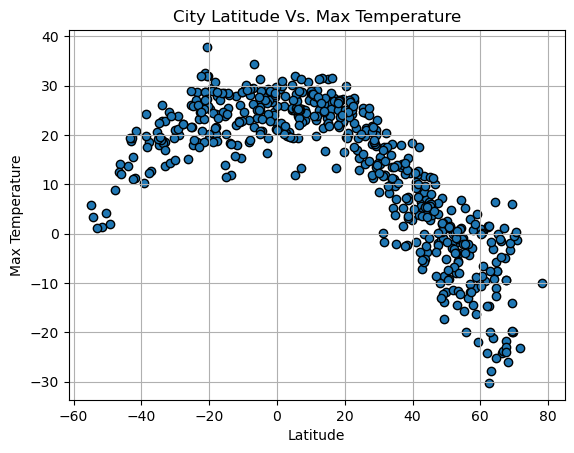

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
temp1 = city_data_df['Max Temp']
lat1 = city_data_df['Lat']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lat1, temp1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude Vs. Max Temperature')
# Save the figure
plt.savefig("../output_data/Lat_Vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

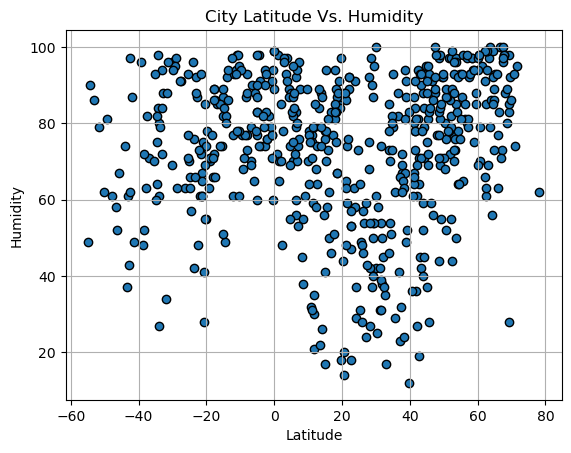

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
hum1 = city_data_df['Humidity']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lat1, hum1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude Vs. Humidity')
# Save the figure
plt.savefig("../output_data/Lat_Vs_Hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

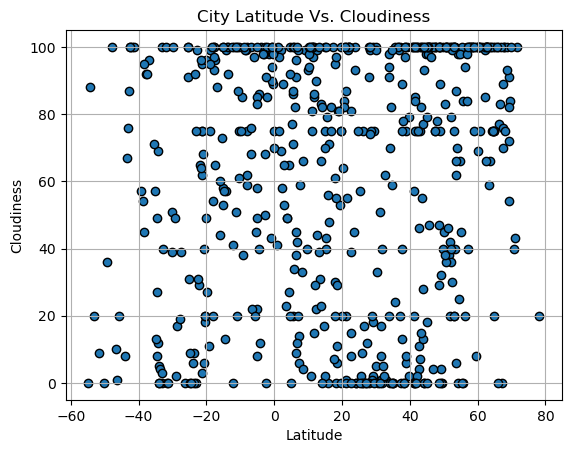

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloud1 = city_data_df['Cloudiness']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lat1, cloud1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude Vs. Cloudiness')
# Save the figure
plt.savefig("../output_data/Lat_Vs_Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

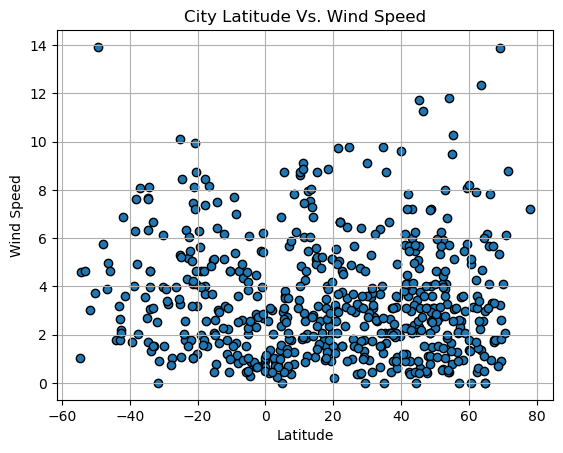

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
spd1= city_data_df['Wind Speed']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lat1, spd1, marker='o', edgecolor = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude Vs. Wind Speed')
# Save the figure
plt.savefig("../output_data/Lat_Vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]
# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,31.39,70,40,8.75,MP,1701405677
2,albany,42.6001,-73.9662,6.52,71,46,0.89,US,1701405678
6,talnakh,69.4865,88.3972,-19.89,92,84,0.89,RU,1701405679
7,petropavlovsk-kamchatsky,53.0452,158.6483,-1.67,77,20,8.00,RU,1701405478
8,thompson,55.7435,-97.8558,-19.91,65,0,5.14,CA,1701405679


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.56,70,31,3.26,PN,1701405677
3,itupiranga,-5.1347,-49.3267,25.18,83,22,2.04,BR,1701405678
4,waitangi,-43.9535,-176.5597,13.79,74,8,1.79,NZ,1701405678
5,ancud,-41.8697,-73.8203,11.25,87,100,6.87,CL,1701405678
13,east london,-33.0153,27.9116,18.52,72,0,6.69,ZA,1701405682


###  Temperature vs. Latitude Linear Regression Plot

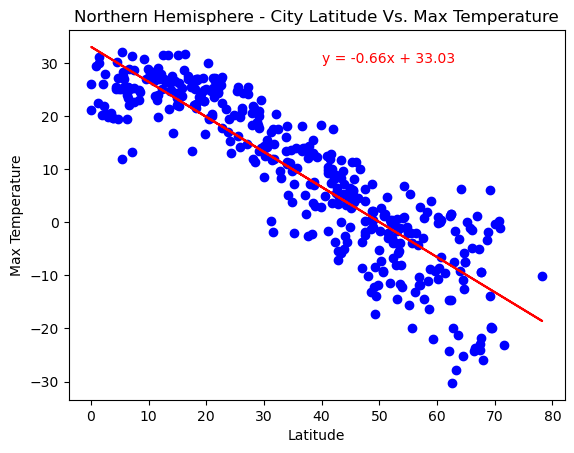

<Figure size 640x480 with 0 Axes>

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
temp2 = northern_hemi_df['Max Temp']
lat2 = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, temp2)
regress_values = lat2 * slope +intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, temp2, marker='o', color = 'blue')
plt.plot(lat2,regress_values,'red')

plt.title('Northern Hemisphere - City Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(40,30), color = 'red', fontsize = 10)
plt.show()
plt.savefig("../output_data/NReg_Lat_Vs_Temp.png")

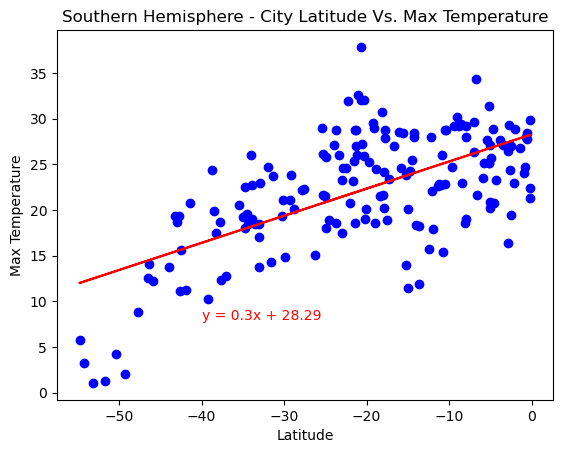

<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
temp3 = southern_hemi_df['Max Temp']
lat3 = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, temp3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, temp3, marker='o', color='blue')
plt.plot(lat3,regress_values,'red')

plt.title('Southern Hemisphere - City Latitude Vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-40,8), color = 'red', fontsize = 10)
plt.show()
plt.savefig("../output_data/SReg_Lat_Vs_Temp.png")

**Discussion about the linear relationship:** 
There is a negative correlation on the Northern Hemisphere between the latitude and maximum temperature. 
There is a positive correlation on the southern hemisphere between the latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

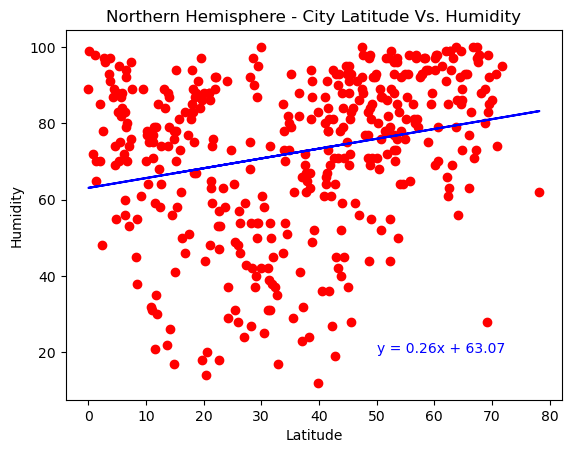

<Figure size 640x480 with 0 Axes>

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
hum2 = northern_hemi_df['Humidity']
lat2 = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, hum2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, hum2, marker='o', color='red')
plt.plot(lat2,regress_values,'blue')

plt.title('Northern Hemisphere - City Latitude Vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(50,20), color='blue', fontsize=10)
plt.show()
plt.savefig("../output_data/NReg_Lat_Vs_Hum.png")

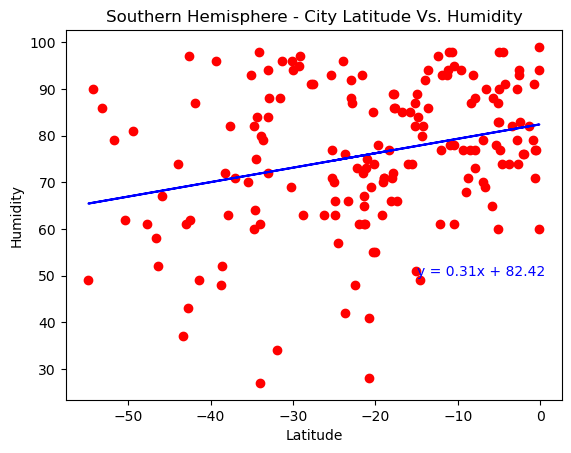

<Figure size 640x480 with 0 Axes>

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
hum3 = southern_hemi_df['Humidity']
lat3 = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, hum3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, hum3, marker='o', color='red')
plt.plot(lat3,regress_values,'blue')

plt.title('Southern Hemisphere - City Latitude Vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-15,50), color='blue', fontsize=10)
plt.show()
plt.savefig("../output_data/SReg_Lat_Vs_Hum.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a small positive correlation in both the northern and southern hemisphere between the latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

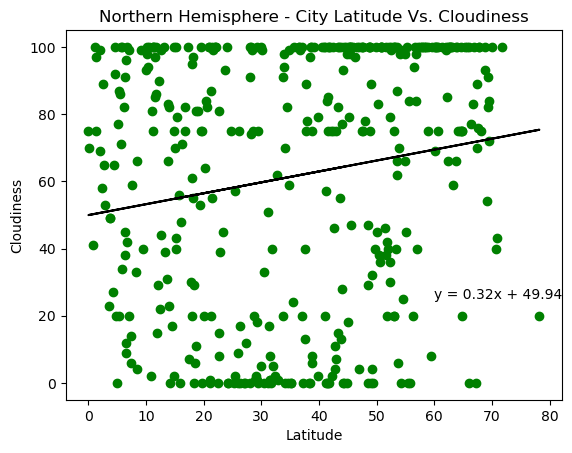

<Figure size 640x480 with 0 Axes>

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

cloud2 = northern_hemi_df['Cloudiness']
lat2 = northern_hemi_df['Lat']



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, cloud2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, cloud2, marker='o', color='green')
plt.plot(lat2,regress_values,'black')

plt.title('Northern Hemisphere - City Latitude Vs. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(60,25), color='black', fontsize=10)
plt.show()
plt.savefig("../output_data/NReg_Lat_Vs_Cloud.png")

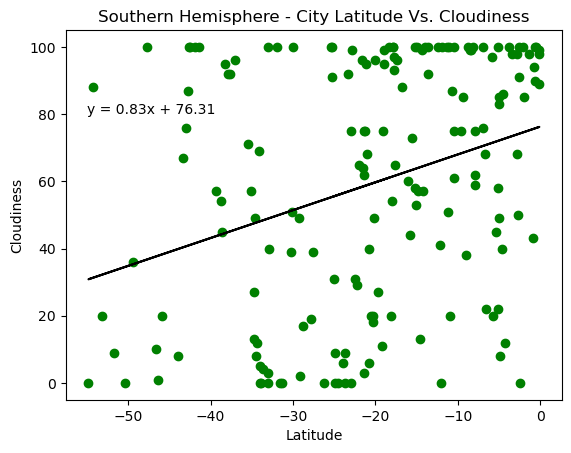

<Figure size 640x480 with 0 Axes>

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

cloud3 = southern_hemi_df['Cloudiness']
lat3 = southern_hemi_df['Lat']



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, cloud3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, cloud3, marker='o', color='green')
plt.plot(lat3,regress_values,'black')

plt.title('Southern Hemisphere - City Latitude Vs. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-55,80), color='black', fontsize=10)
plt.show()
plt.savefig("../output_data/SReg_Lat_Vs_Cloud.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both the northern and southern hemisphere have a small positive correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

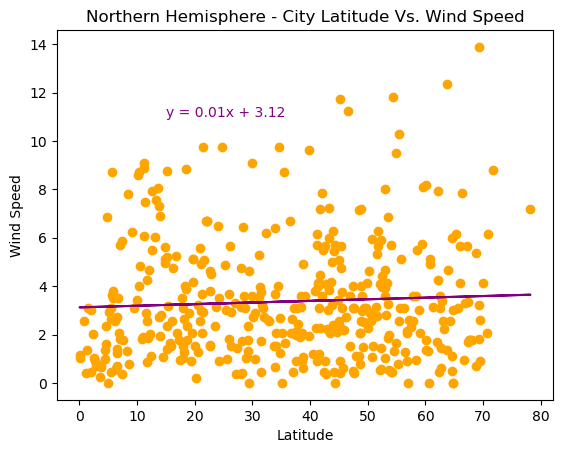

<Figure size 640x480 with 0 Axes>

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
wind2 = northern_hemi_df['Wind Speed']
lat2 = northern_hemi_df['Lat']



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat2, wind2)
regress_values = lat2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat2, wind2, marker='o', color='Orange')
plt.plot(lat2,regress_values,'purple')

plt.title('Northern Hemisphere - City Latitude Vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(15,11), color='purple', fontsize=10)
plt.show()
plt.savefig("../output_data/NReg_Lat_Vs_Wind.png")

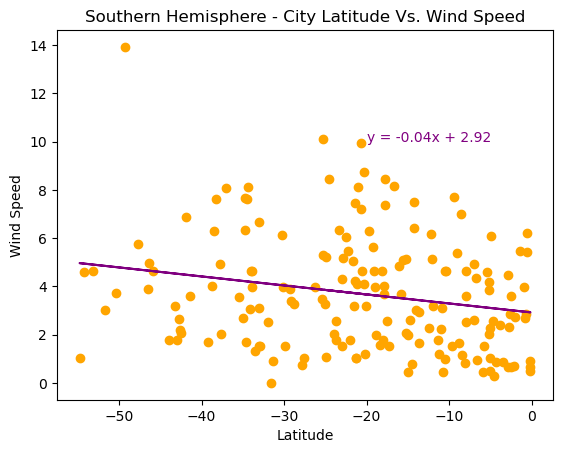

<Figure size 640x480 with 0 Axes>

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
wind3 = southern_hemi_df['Wind Speed']
lat3 = southern_hemi_df['Lat']



(slope, intercept, rvalue, pvalue, stderr) = linregress(lat3, wind3)
regress_values = lat3 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(lat3, wind3, marker='o', color='orange')
plt.plot(lat3,regress_values,'purple')

plt.title('Southern Hemisphere - City Latitude Vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(line_eq,(-20,10), color='purple', fontsize=10)
plt.show()
plt.savefig("../output_data/SReg_Lat_Vs_Wind.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The nothern hemisphere has no correlation between the latitude and wind speed. 
The southern hemisphere has a negative correlation between latitude and wind speed. 